# Baseline models 

In [1]:
import matplotlib.pyplot as plt 
import  pandas as pd
import numpy as np 

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [2]:
# Set matplotlib params
plt.rcParams['figure.figsize'] = (9,6)

## Read the data 

In [3]:
# source: https://raw.githubusercontent.com/plotly/datasets/master/monthly-milk-production-pounds.csv

# Load data
df = pd.read_csv('./data/monthly-milk-production-pounds.csv')
df.columns = ['Month', 'Milk']
print(df.shape)
df.head()


(168, 2)


,Month,Milk
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


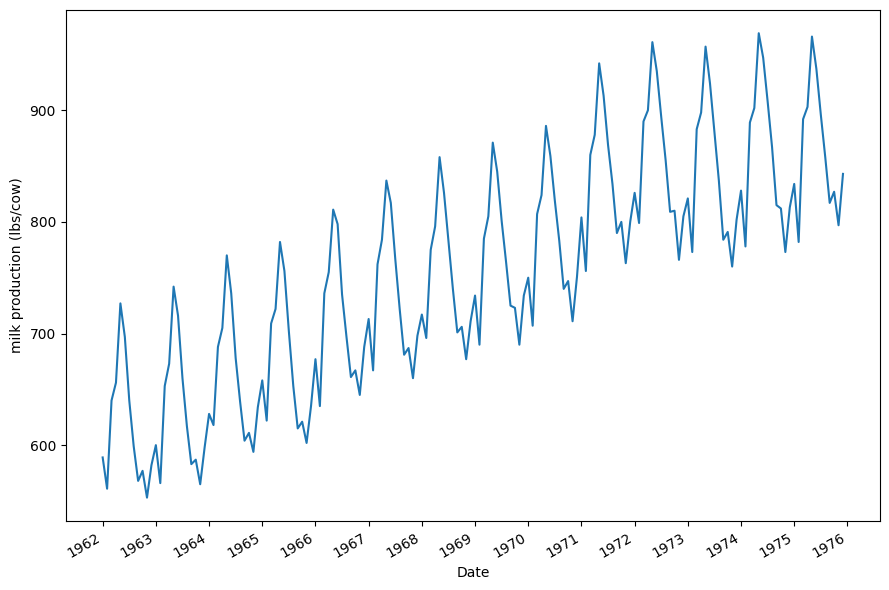

In [5]:
fig, ax = plt.subplots()

ax.plot(df.Month, df.Milk)
ax.set_xlabel('Date')
ax.set_ylabel('milk production (lbs/cow)')

plt.xticks(np.arange(0, 179, 12), np.arange(1962, 1977, 1))

fig.autofmt_xdate()
plt.tight_layout()

## Train/test split 

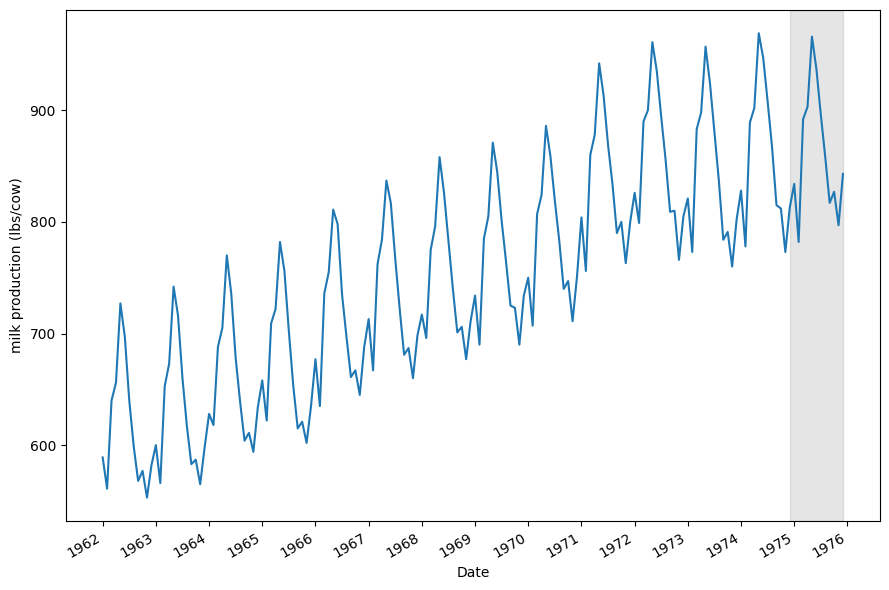

In [6]:
fig, ax = plt.subplots()

ax.plot(df.Month, df.Milk)
ax.set_xlabel('Date')
ax.set_ylabel('milk production (lbs/cow)')

plt.xticks(np.arange(0, 179, 12), np.arange(1962, 1977, 1))
ax.axvspan(155,167,color='#808080', alpha=0.2)

fig.autofmt_xdate()
plt.tight_layout()

In [7]:
# split
train = df[:-12]
test = df[-12:]

## Baseline 1: Predict the mean 

In [8]:
# test copy
pred_df = test.copy()

pred_df['mean'] = np.mean(train.Milk)

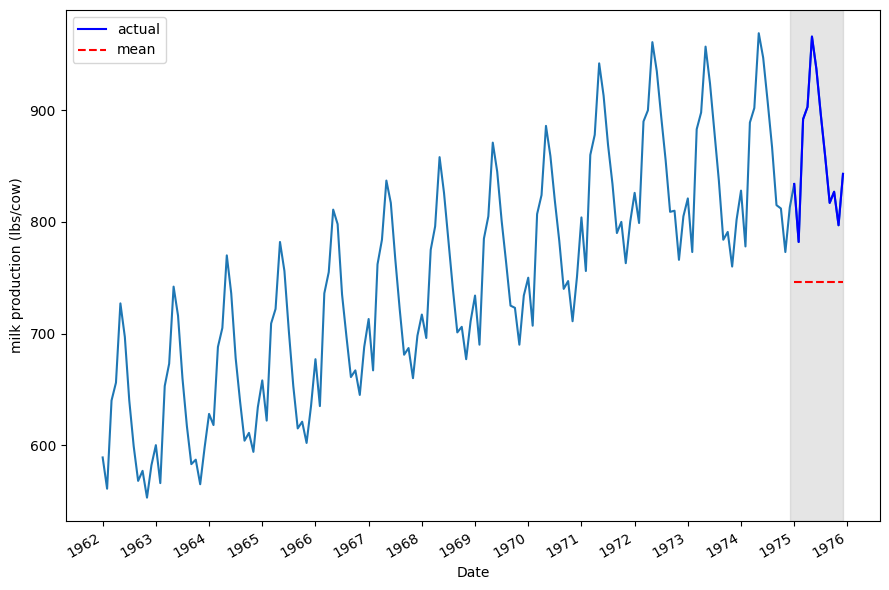

In [9]:
fig, ax = plt.subplots()

ax.plot(df.Month, df.Milk)
ax.plot(pred_df.Month, pred_df.Milk, 'b-', label='actual')
ax.plot(pred_df['mean'], 'r--', label = 'mean')
ax.set_xlabel('Date')
ax.set_ylabel('milk production (lbs/cow)')
ax.legend(loc='best')

plt.xticks(np.arange(0, 179, 12), np.arange(1962, 1977, 1))
ax.axvspan(155,167,color='#808080', alpha=0.2)

fig.autofmt_xdate()
plt.tight_layout()

## Baseline 2: Predict last year's mean

In [10]:
# Mean last year
pred_df['mean_last_year'] = np.mean(train.Milk[-12:])

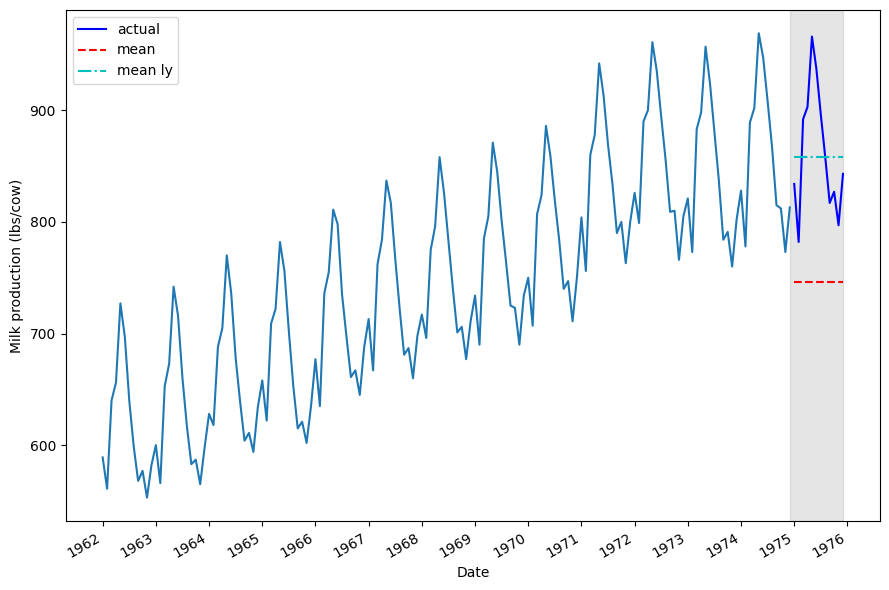

In [13]:
fig, ax = plt.subplots()

ax.plot(train['Month'], train['Milk'])
ax.plot(pred_df['Month'], pred_df['Milk'], 'b-', label='actual')
ax.plot(pred_df['mean'], 'r--', label='mean')
# Plot the predictions of last year's mean
ax.plot(pred_df.mean_last_year, 'c-.', label='mean ly')

ax.set_xlabel('Date')
ax.set_ylabel('Milk production (lbs/cow)')
ax.legend(loc='best')

plt.xticks(np.arange(0, 179, 12), np.arange(1962, 1977, 1))
ax.axvspan(155, 167, color='#808080', alpha=0.2)

fig.autofmt_xdate()
plt.tight_layout()

## Baseline 3: Predict the last known value 

In [16]:
# last value
pred_df['last'] = train.Milk.iloc[-1]

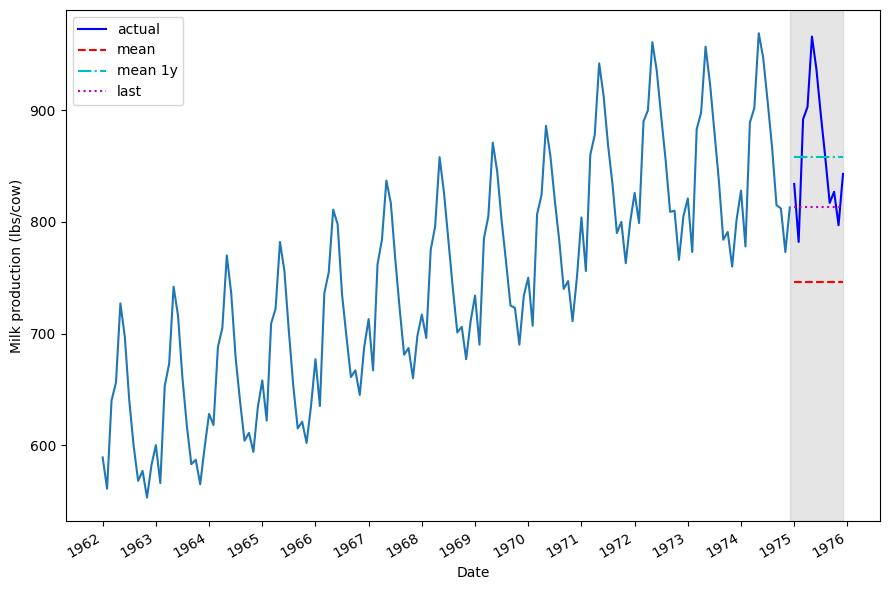

In [17]:
fig, ax = plt.subplots()

ax.plot(train['Month'], train['Milk'])
ax.plot(pred_df['Month'], pred_df['Milk'], 'b-', label='actual')
ax.plot(pred_df['mean'], 'r--', label='mean')
ax.plot(pred_df['mean_last_year'], 'c-.', label='mean 1y')
# Plot the prediction of the last known value
ax.plot(pred_df['last'], 'm:', label='last')
ax.set_xlabel('Date')
ax.set_ylabel('Milk production (lbs/cow)')
ax.legend(loc='best')

plt.xticks(np.arange(0, 179, 12), np.arange(1962, 1977, 1))
ax.axvspan(155, 167, color='#808080', alpha=0.2)

fig.autofmt_xdate()
plt.tight_layout()

## Predict the last season 

In [22]:
# Last season
pred_df['last_season'] = train.Milk[-12:].values

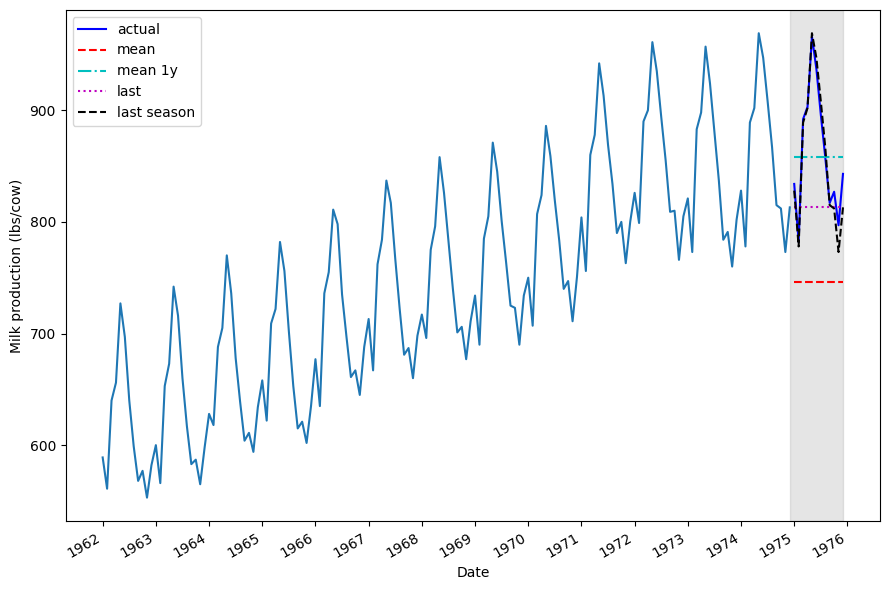

In [23]:
fig, ax = plt.subplots()

ax.plot(train['Month'], train['Milk'])
ax.plot(pred_df['Month'], pred_df['Milk'], 'b-', label='actual')
ax.plot(pred_df['mean'], 'r--', label='mean')
ax.plot(pred_df['mean_last_year'], 'c-.', label='mean 1y')
ax.plot(pred_df['last'], 'm:', label='last')
# Plot the predictions of the last season
ax.plot(pred_df['last_season'], 'k--', label='last season')

ax.set_xlabel('Date')
ax.set_ylabel('Milk production (lbs/cow)')
ax.legend(loc='best')

plt.xticks(np.arange(0, 179, 12), np.arange(1962, 1977, 1))
ax.axvspan(155, 167, color='#808080', alpha=0.2)

fig.autofmt_xdate()
plt.tight_layout()

## Evaluation 

In [27]:
# define mape
def mape(y_true, y_pred):

    return round(np.mean(np.abs((y_true - y_pred) / y_true) * 100), 2)

In [28]:
# Now mapes
mape_mean = mape(pred_df.Milk, pred_df['mean'])
mape_mean_ly = mape(pred_df.Milk, pred_df.mean_last_year)
mape_last = mape(pred_df.Milk, pred_df['last'])
mape_last_season = mape(pred_df.Milk, pred_df.last_season)

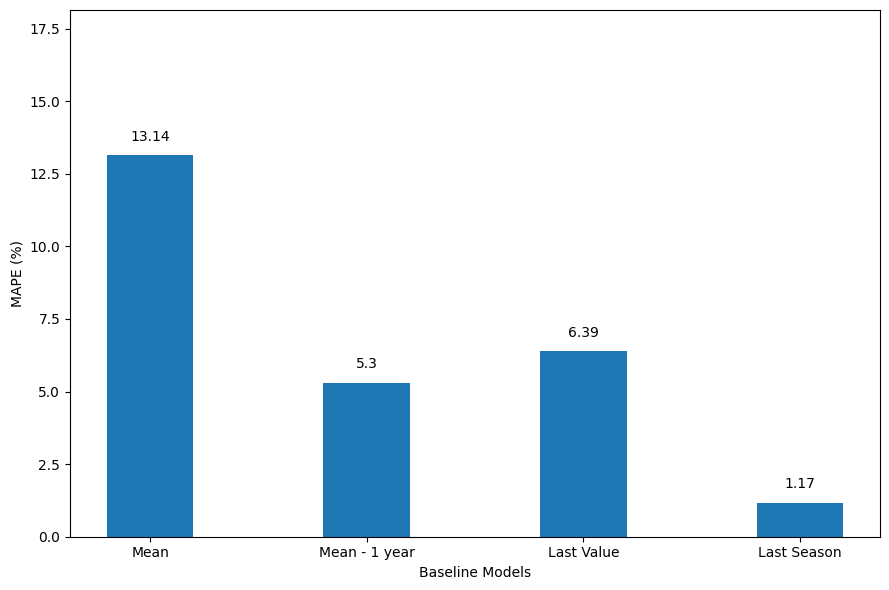

In [31]:
fig, ax = plt.subplots()

x = ['Mean', 'Mean - 1 year', 'Last Value', 'Last Season']
y = [mape_mean, mape_mean_ly, mape_last, mape_last_season]

# Bar chart
ax.bar(x, y, width=0.4)
ax.set_xlabel('Baseline Models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, max(y) + 5)

for index, value in enumerate(y):

    plt.text(x = index, y = value + 0.5, s = str(value), ha='center')

plt.tight_layout()